<a href="https://colab.research.google.com/github/rlehrter-blm/Drought-Tools/blob/main/DroughtIndexSuite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suite of Drought Indices -- Explanation and Setup**

**What drought related data does this script provide?**

This preliminary script provides a straightforward, replicable method to obtain data related to drought conditions. By specifying a time period (1 year, by default) and centroid of your study area, you can obtain graphs of 4 different drought indices:


*   US Drought Monitor (USDM)
*   Multi-Indicator Drought Index (MIDI)
*   Palmer Drought Severity Index (PDSI)
*   Evaporate Demand Drought Index (EDDI) 1-Year

## **Setup**

Enter your API key below to get this script to work. If you don't yet have an API key, you may request one [here](https://support.climateengine.org/article/12-climate-engine-apis).

In [9]:
# Set root URL for API requests
root_url = 'https://api.climateengine.org/'
# Authentication info for the API (INSERT YOUR OWN KEY)
headers = {'Authorization': 'Enter Key Here'}

This defines a custom function for cleaning up the workspace after running each section. Hit run, do not change.

In [10]:
def delete_objects(*args):
    """
    Deletes objects in a Python session if they exist.

    Args:
        *args: A list of strings representing the names of objects to be deleted.
    """
    for obj in args:
        try:
            del globals()[obj]
        except KeyError:
            pass

Import all needed packages. Hit run, do not change.

In [11]:
#Import/Install Packages
import datetime
import os
import requests
import time
      
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
import numpy as np
requests.packages.urllib3.disable_warnings(requests.packages.urllib3.exceptions.InsecureRequestWarning)

**Specify Time Frame of Analysis:** The script is set, by default, to pull the last 365 days of data. To adjust the time frame, change the number of "days" in "datetime.timedelta(days=*365*)". 

Alternatively, you can adjust the dates in the "params" call by entering a start and end date in *'YYYY-MM-DD'* format, with apostrophes and dashes.

In [12]:
#Time frame
today = datetime.date.today()

delta = datetime.timedelta(days=365)
days_ago = today - delta

today = today.strftime('%Y-%m-%d')

days_ago = days_ago.strftime('%Y-%m-%d')

**Specify Location of Analysis:** Enter the coordinates for a centroid of your study area in decimal degrees. Note the order of lat/long -- If you mix these up or forget a minus sign then you'll get an error when running the API call.

In [13]:
#Location
location = '[[-104.9903, 39.7392]]'

# US Drought Monitor

### The U.S. Drought Monitor (USDM) is a map that is updated each Thursday to show the location and intensity of drought across the country. 

The USDM uses a five-category system, labeled Abnormally Dry or D0, (a precursor to drought, not actually drought), and Moderate (D1), Severe (D2), Extreme (D3) and Exceptional (D4) Drought. Drought categories show experts’ assessments of conditions related to dryness and drought including observations of how much water is available in streams, lakes, and soils compared to usual for the same time of year. The U.S. Drought Monitor began in 2000 and is a collaboration between the NDMC, NOAA and the USDA, who share the weekly author role for the product.  The NDMC, based at University of Nebraska, Lincoln, leads the coordination of weekly drought monitor process and provides the maps, data and statistics to the public.  

**Where does this come from?**

Each week, drought experts consider how recent precipitation totals across the country compare to their long-term averages. They check variables including temperatures, soil moisture, water levels in streams and lakes, snow cover, and meltwater runoff. Experts also check whether areas are showing drought impacts such as water shortages and business interruptions. Based on dozens of indicators, experts make their best judgments of regional-scale drought conditions, and then check their assessments with experts in the field before publishing weekly drought maps. Associated statistics show what proportion of various geographic areas are in each category of dryness or drought, and how many people are affected. 

Source: [Drought.gov](https://www.drought.gov/data-maps-tools/us-drought-monitor)

In [5]:
#US Drought Monitor Timeseries for the below coordinates
# Endpoint
endpoint1 = 'timeseries/native/points'

# Set up parameters for API call
params1 = {
    'dataset': 'USDM_DROUGHT_MONITOR',
    'variable': 'usdm',
    'start_date': days_ago,
    'end_date': today,
    'coordinates': location,
    'area_reducer': 'mean'
}
# Send request to the API
r1 = requests.get(root_url + endpoint1, params=params1, headers=headers, verify=False)
response1 = r1.json()

In [6]:
#response (may need to unpack with [] around timeseries the first time)
[timeseries] = response1

#Select Data
data = timeseries['Data']

# Convert to dataframe
df1 = pd.DataFrame.from_dict(data)
print(df1)

#Export CSV
#df1.to_csv('ltb_mean_42year.csv')

#Filter out non-available data i.e. values of -9999.000
df2 = df1[df1['usdm']>-10]

#Format dates for plotting
df2['Date'] = pd.to_datetime(df2['Date'])

#Set x values to date variable
date1 = df2['Date']

#Set y values to value variable
value1 = df2['usdm']

          Date  usdm
0   2022-04-05   0.0
1   2022-04-12   0.0
2   2022-04-19   1.0
3   2022-04-26   1.0
4   2022-05-03   1.0
5   2022-05-10   1.0
6   2022-05-17   1.0
7   2022-05-24   1.0
8   2022-05-31   1.0
9   2022-06-07   0.0
10  2022-06-14   0.0
11  2022-06-21   0.0
12  2022-06-28   1.0
13  2022-07-05   1.0
14  2022-07-12   1.0
15  2022-07-19   2.0
16  2022-07-26   2.0
17  2022-08-02   2.0
18  2022-08-09   1.0
19  2022-08-16   1.0
20  2022-08-23   1.0
21  2022-08-30   1.0
22  2022-09-06   1.0
23  2022-09-13   1.0
24  2022-09-20   1.0
25  2022-09-27   1.0
26  2022-10-04   1.0
27  2022-10-11   1.0
28  2022-10-18   1.0
29  2022-10-25   1.0
30  2022-11-01   1.0
31  2022-11-08   1.0
32  2022-11-15   1.0
33  2022-11-22   1.0
34  2022-11-29   0.0
35  2022-12-06   0.0
36  2022-12-13   0.0
37  2022-12-20   0.0
38  2022-12-27   0.0
39  2023-01-03  -1.0
40  2023-01-10  -1.0
41  2023-01-17  -1.0
42  2023-01-24  -1.0
43  2023-01-31  -1.0
44  2023-02-07  -1.0
45  2023-02-14  -1.0
46  2023-02-2

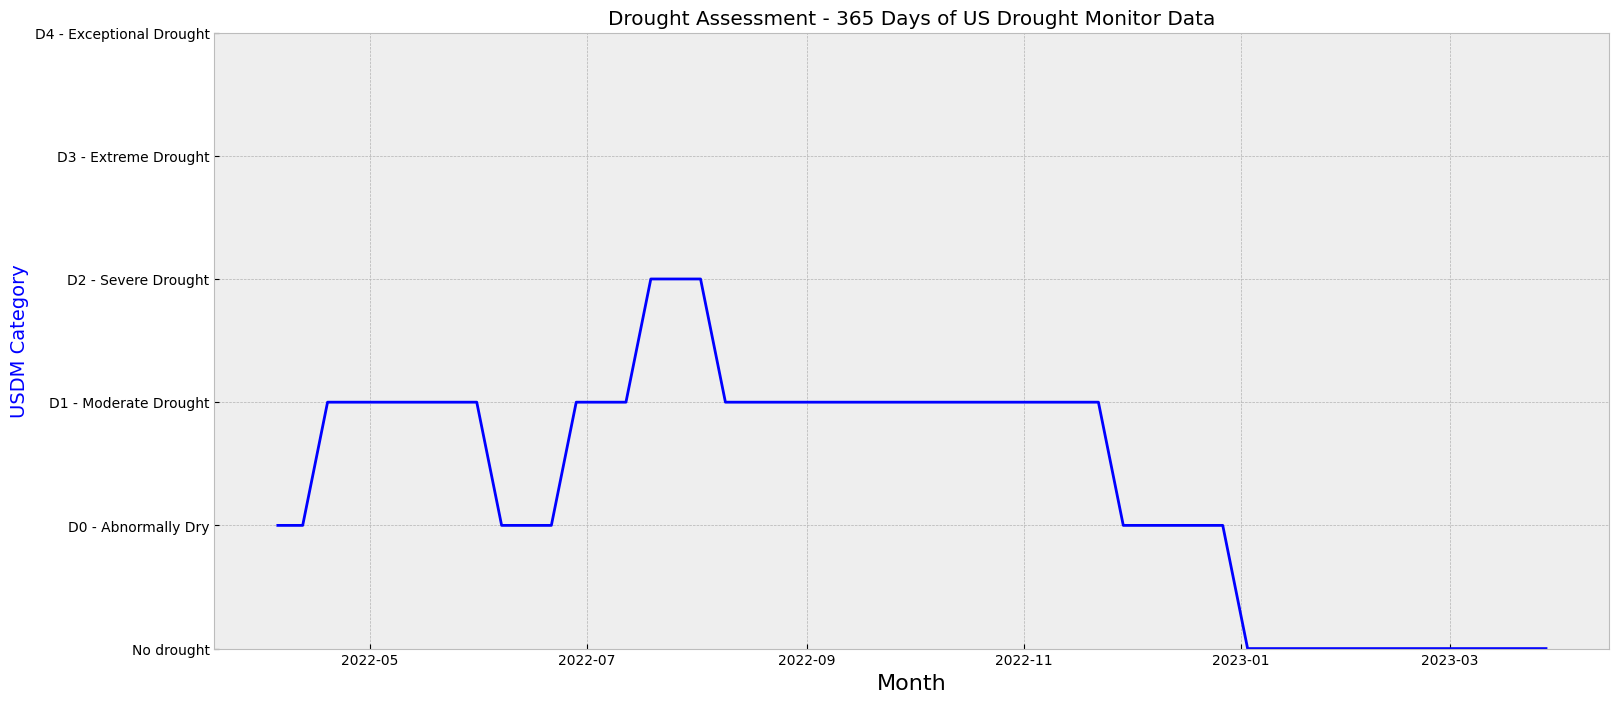

NameError: ignored

In [7]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (18,8))

# make a plot
ax.plot(date1, value1, color="blue")

#Change Y scale
ax.set_ylim(-1,4)

#Change Y steps and labels
y = np.array([-1, 0, 1, 2, 3, 4])
ticks = ['No drought', 'D0 - Abnormally Dry', 'D1 - Moderate Drought', 'D2 - Severe Drought', 'D3 - Extreme Drought', 'D4 - Exceptional Drought']
plt.yticks(y, ticks)

#Add x-axis label
ax.set_xlabel("Month", fontsize = 16)

#Add first y-axis label
ax.set_ylabel("USDM Category", color="blue", fontsize=14)

#Add Title
plt.title('Drought Assessment - 365 Days of US Drought Monitor Data')

#Export Graph
plt.savefig('USDM_Plot.png', bbox_inches='tight')

#Show Graph
plt.show()

delete_objects('endpoint1', 'endpoint2', 'params1', 'params2', 'r1', 'r2', 'response1', 'response2', 'data', 'df1', 'df2', 'date1', 'date2', 'value1', 'value2', 'ticks', 'timeseries', 'y', 'trace1', 'trace2', 'ax', 'ax2')

**How to interpret this plot:**

The U.S. Drought Monitor is updated each Thursday to show the location and intensity of drought across the country, which uses a five-category system, from Abnormally Dry (D0) conditions to Exceptional Drought (D4).

# Multi-Indicator Drought Index (MIDI)

### The Multi-Indicator Drought Index (MIDI) looks at current drought conditions across the U.S. by integrating several key drought monitoring indices into a single objective, computer-generated map. This experimental drought map is based on the methodology developed at the NOAA National Weather Service's Climate Prediction Center.

The short-term MIDI combines the Palmer Drought Severity Index (PDSI), Z-Index, 1-month Standardized Precipitation Index (SPI), and 3-month SPI to approximate drought impacts from changes in precipitation and moisture over a short-term timeframe.

The long-term MIDI combines PDSI, Z-Index, and 6-month, 1-year, 2-year, and 5-year SPI to to approximate drought impacts from changes in precipitation and moisture over a long-term timeframe.

The short- and long-term MIDI products are created using the Climate Engine tool, and apply the Climate Prediction Center's weighting ratios to the high-resolution gridMET gridded dataset. The data are updated every 5 days, with a delay of 4 to 5 days to allow for data collection and quality control.

The Multi-Indicator Drought Index is the result of NIDIS-funded research.

Source: [Drought.gov](https://www.drought.gov/data-maps-tools/multi-indicator-drought-index-midi)

In [14]:
#Long Term Drought Blend Timeseries 
# Endpoint
endpoint1 = 'timeseries/native/points'

# Set up parameters for API call
params1 = {
    'dataset': 'GRIDMET_DROUGHT',
    'variable': 'long_term_blend',
    'start_date': days_ago,
    'end_date': today,
    'coordinates': location,
    'area_reducer': 'mean'
}
# Send request to the API
r1 = requests.get(root_url + endpoint1, params=params1, headers=headers, verify=False)
response1 = r1.json()

In [15]:
#response (may need to unpack with [] around timeseries the first time)
[timeseries] = response1

#Select Data
data = timeseries['Data']

# Convert to dataframe
df1 = pd.DataFrame.from_dict(data)
print(df1)

#Export CSV
#df1.to_csv('ltb_mean_42year.csv')

#Filter out non-available data i.e. values of -9999.000
df2 = df1[df1['long_term_blend']>-10]

#Format dates for plotting
df2['Date'] = pd.to_datetime(df2['Date'])

#Set x values to date variable
date1 = df2['Date']

#Set y values to value variable
value1 = df2['long_term_blend']

          Date  long_term_blend
0   2022-04-05          -0.7633
1   2022-04-10          -0.8070
2   2022-04-15          -1.0140
3   2022-04-20          -1.0887
4   2022-04-25          -1.1765
..         ...              ...
67  2023-03-06          -0.8030
68  2023-03-11          -0.8535
69  2023-03-16          -0.8762
70  2023-03-21          -0.9295
71  2023-03-26          -0.9083

[72 rows x 2 columns]


In [16]:
#Short Term Drought Blend Timeseries 
# Endpoint
endpoint2 = 'timeseries/native/points'

# Set up parameters for API call
params2 = {
    'dataset': 'GRIDMET_DROUGHT',
    'variable': 'short_term_blend',
    'start_date': days_ago,
    'end_date': today,
    'coordinates': location,
    'area_reducer': 'mean'
}
# Send request to the API
r2 = requests.get(root_url + endpoint2, params=params2, headers=headers, verify=False)
response2 = r2.json()

In [17]:
#response (may need to unpack with [] around timeseries the first time)
[timeseries] = response2

#Select Data
data = timeseries['Data']

# Convert to dataframe
df1 = pd.DataFrame.from_dict(data)
print(df1)

#Export CSV
#df1.to_csv('stb_mean_42year.csv')

#Filter out non-available data i.e. values of -9999.000
df2 = df1[df1['short_term_blend']>-10]

#Format dates for plotting
df2['Date'] = pd.to_datetime(df2['Date'])

#Set x values to date variable
date2 = df2['Date']

#Set y values to value variable
value2 = df2['short_term_blend']

          Date  short_term_blend
0   2022-04-05            0.0627
1   2022-04-10           -0.0615
2   2022-04-15           -0.6610
3   2022-04-20           -0.9077
4   2022-04-25           -1.1990
..         ...               ...
67  2023-03-06           -0.1730
68  2023-03-11           -0.1822
69  2023-03-16            0.0080
70  2023-03-21           -0.3320
71  2023-03-26           -0.3373

[72 rows x 2 columns]


In [18]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# create figure object with two subplots
fig = make_subplots(rows=1, cols=2, shared_xaxes=True)

# create first trace for line plot in first subplot
trace1 = go.Scatter(x=date1, y=value1, mode='lines', name='Long Term Blend', line=dict(color='blue'))

# add first trace to first subplot
fig.add_trace(trace1, row=1, col=1)

# modify y-axis of first subplot
fig.update_yaxes(range=[-2.5, 2.5], tickvals=[-2.5, -2.0, -1.5, -1.2, -0.7, 0.5, 0, 0.5, 0.7, 1.2, 1.5, 2.0, 2.5],
                 ticktext=['D4 - Exceptional Drought', 'D3 - Extreme Drought', 'D2 - Severe Drought', 'D1 - Moderate Drought',
                           'D0 - Abnormal Dry', '', 'Neutral', '', 'W0: Abnormal Wet', 'W1: Moderate Wet',
                           'W2: Severe Wet', 'W3: Extreme Wet', 'W4: Exceptional Wet'], row = 1, col = 1)

# add x-axis label to first subplot
fig.update_xaxes(title_text='Month', row=1, col=1)

# create second trace for line plot in second subplot
trace2 = go.Scatter(x=date2, y=value2, mode='lines', name='Short Term Blend', line=dict(color='green'))

# add second trace to second subplot
fig.add_trace(trace2, row=1, col=2)

# add second y-axis to second subplot
fig.update_layout(yaxis2=dict(range=[-2.5, 2.5]))

# add title to figure
fig.update_layout(title='Long-Term vs. Short-Term Blend Drought Indices - gridMET')

# show figure
fig.show()

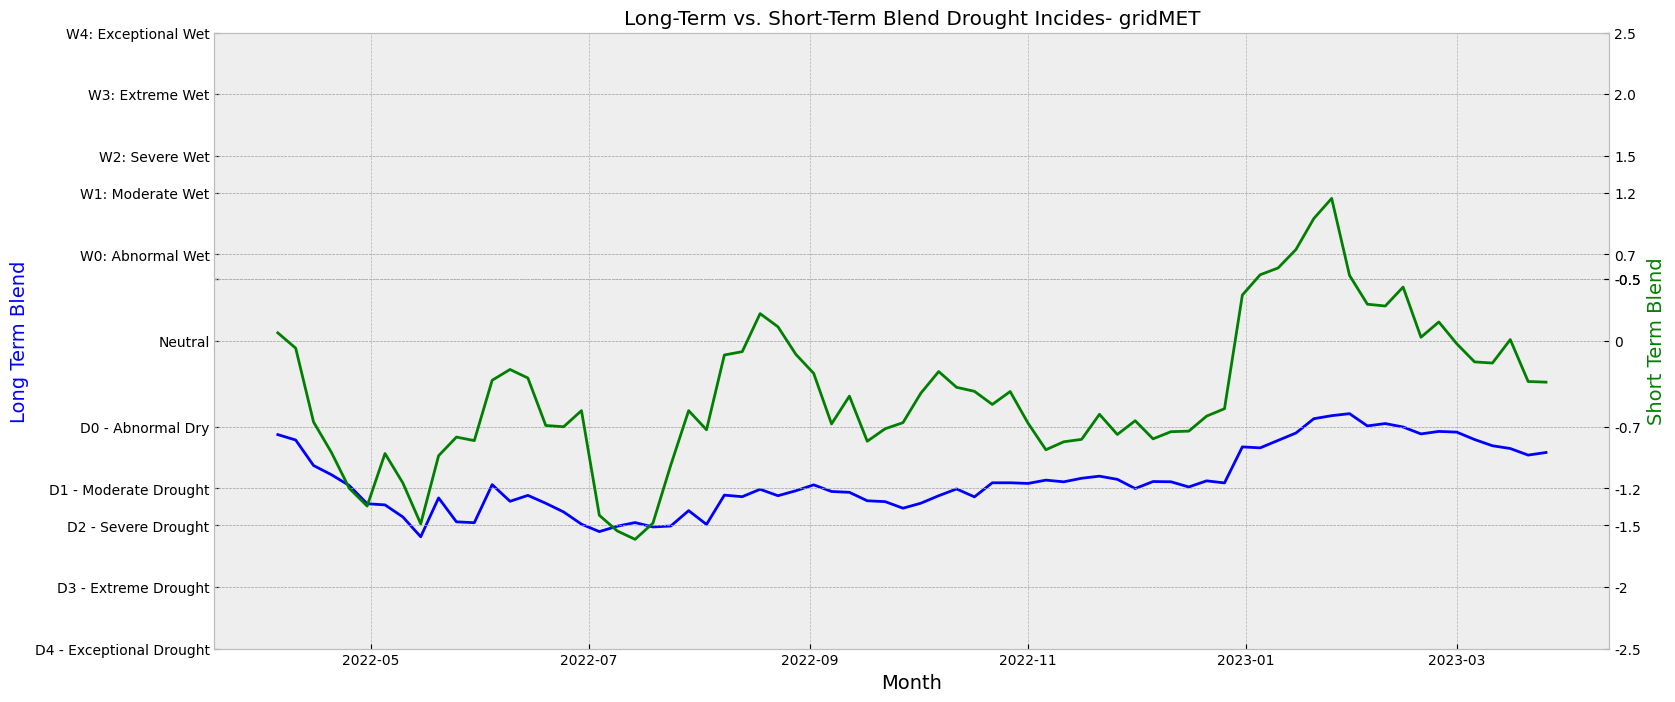

In [19]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (18,8))

# make a plot
ax.plot(date1, value1, color="blue")

#Change Y1 Scale
ax.set_ylim(-2.5, 2.5)

#Change Y steps and labels
y = np.array([-2.5, -2.0, -1.5, -1.2, -0.7, 0.5, 0, 0.5, 0.7, 1.2, 1.5, 2.0, 2.5])
ticks = ['D4 - Exceptional Drought', 'D3 - Extreme Drought', 'D2 - Severe Drought', 'D1 - Moderate Drought', 'D0 - Abnormal Dry', '', 'Neutral', '', 'W0: Abnormal Wet', 'W1: Moderate Wet', 'W2: Severe Wet', 'W3: Extreme Wet', 'W4: Exceptional Wet']
plt.yticks(y, ticks)

#Add x-axis label
ax.set_xlabel("Month", fontsize = 14)

#Add first y-axis label
ax.set_ylabel("Long Term Blend", color="blue", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(date2, value2, color="green")

#Add Second y-axis Label
ax2.set_ylabel("Short Term Blend",color="green",fontsize=14)
ax2.set_yticks([-2.5, -2, -1.5, -1.2, -0.7, 0.5, 0, 0.5, 0.7, 1.2, 1.5, 2.0, 2.5])
ax2.set_yticklabels([-2.5, -2, -1.5, -1.2, -0.7, -0.5, 0, -0.5, 0.7, 1.2, 1.5, 2.0, 2.5])

#Add Title
plt.title('Long-Term vs. Short-Term Blend Drought Incides- gridMET')

#Export Graph
plt.savefig('Two_Variable_Blend_Plot.png', bbox_inches='tight')

#Show Graph
plt.show()

delete_objects('endpoint1', 'endpoint2', 'params1', 'params2', 'r1', 'r2', 'response1', 'response2', 'data', 'df1', 'df2', 'date1', 'date2', 'value1', 'value2', 'ticks', 'timeseries', 'y', 'trace1', 'trace2', 'ax', 'ax2')

**How to interpret the above plots:** 



*   -2.5 **-** -2.0: Exceptional Drought
*   -2.0 **-** -1.5: Extreme Drought
*   -1.5 **-** -1.2: Severe Drought
*   -1.2 **-** -0.7: Moderate Drought
*   -0.7 **-** -0.5: Abnormal Dry
*   -0.5 **-** 0.5: Neutral
*   0.5 **-** 0.7: Abnormal Wet
*   0.7 **-** 1.2: Moderate Wet
*   1.2 **-** 1.5: Severe Wet
*   1.5 **-** 2.0: Extreme Wet
*   2.0 **-** 2.5: Exceptional Wet



# Palmer Drought Severity Index (PDSI)

### The PDSI is a standardized index based on a simplified soil water balance and estimates relative soil moisture conditions.

This new experimental implementation of the Palmer Drought Severity Index (PDSI) updates every 5 days, with a delay of 4 to 5 days, using the high-resolution gridMET gridded research dataset and USDA STATSGO soils data. A PDSI value >4 represents very wet conditions, while a PDSI <-4 represents an extreme drought. 

Source: [Drought.gov](https://www.drought.gov/data-maps-tools/us-gridded-palmer-drought-severity-index-pdsi-gridmet#:~:text=The%20PDSI%20is%20a%20standardized,4%20represents%20an%20extreme%20drought.).

In [20]:
#PDSI calculated using gridMET
# Endpoint
endpoint1 = 'timeseries/native/points'

# Set up parameters for API call
params1 = {
    'dataset': 'GRIDMET_DROUGHT',
    'variable': 'pdsi',
    'start_date': days_ago,
    'end_date': today,
    'coordinates': location,
    'area_reducer': 'mean'
}
# Send request to the API
r1 = requests.get(root_url + endpoint1, params=params1, headers=headers, verify=False)
response1 = r1.json()

In [21]:
#response (may need to unpack with [] around timeseries the first time)
[timeseries] = response1

#Select Data
data = timeseries['Data']

# Convert to dataframe
df1 = pd.DataFrame.from_dict(data)
print(df1)

#Export CSV
#df1.to_csv('ltb_mean_42year.csv')

#Filter out non-available data i.e. values of -9999.000
df2 = df1[df1['pdsi']>-10]

#Format dates for plotting
df2['Date'] = pd.to_datetime(df2['Date'])

#Set x values to date variable
date1 = df2['Date']

#Set y values to value variable
value1 = df2['pdsi']

          Date  pdsi
0   2022-04-05 -1.09
1   2022-04-10 -1.12
2   2022-04-15 -1.24
3   2022-04-20 -1.41
4   2022-04-25 -1.58
..         ...   ...
67  2023-03-06 -1.06
68  2023-03-11 -1.10
69  2023-03-16 -1.11
70  2023-03-21 -1.16
71  2023-03-26 -1.21

[72 rows x 2 columns]


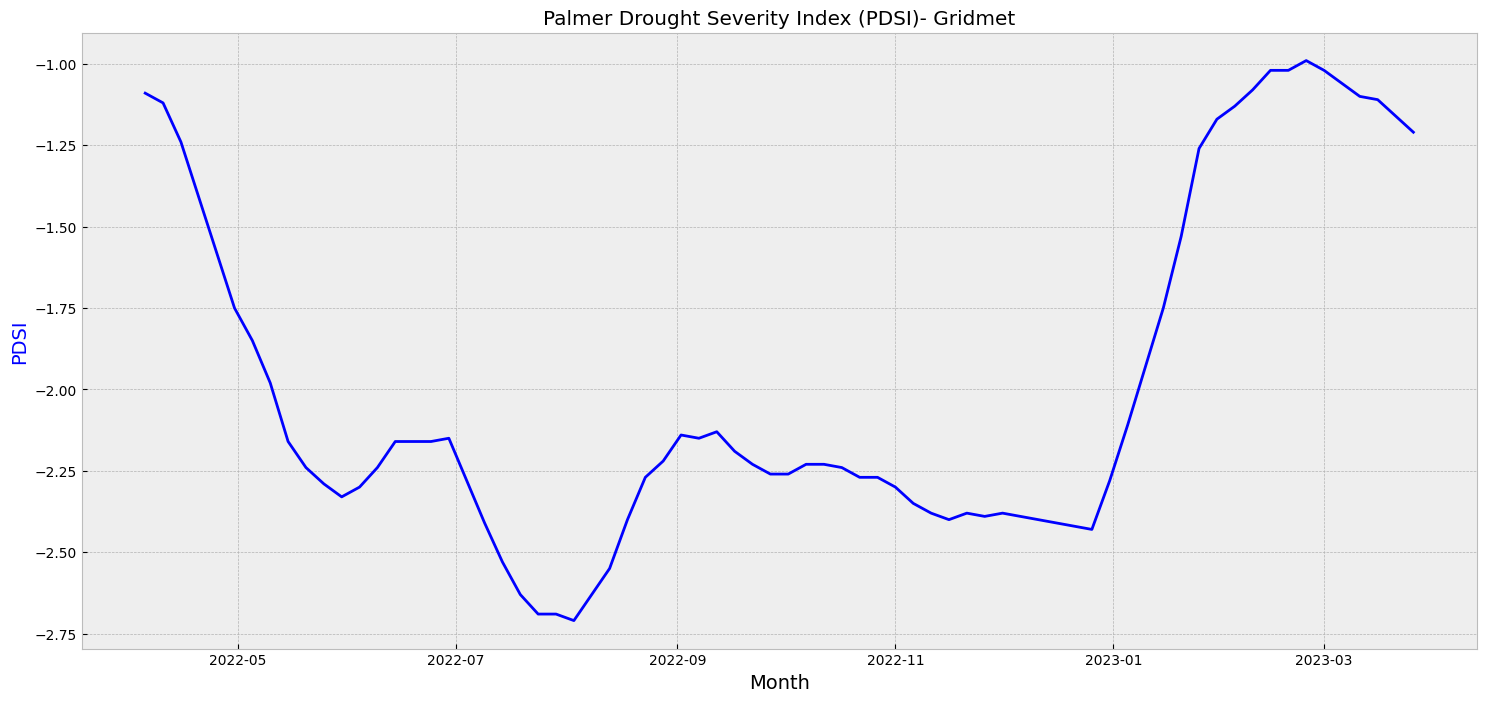

In [22]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (18,8))

# make a plot
ax.plot(date1, value1, color="blue")

#Add x-axis label
ax.set_xlabel("Month", fontsize = 14)

#Add y-axis label
ax.set_ylabel("PDSI", color="blue", fontsize=14)

#Add Title
plt.title('Palmer Drought Severity Index (PDSI)- Gridmet')

#Export Graph
plt.savefig('PDSI.png', bbox_inches='tight')

#Show Graph
plt.show()

delete_objects('endpoint1', 'endpoint2', 'params1', 'params2', 'r1', 'r2', 'response1', 'response2', 'data', 'df1', 'df2', 'date1', 'date2', 'value1', 'value2', 'ticks', 'timeseries', 'y', 'trace1', 'trace2', 'ax', 'ax2')

**How to interpret the above plot:**

The magnitude of PDSI indicates the severity of the departure from normal conditions. A PDSI value >4 represents very wet conditions, while a PDSI <-4 represents an extreme drought. 

# Evaporative Demand Drought Index (EDDI) 1-Year

### The Evaporative Demand Drought Index (EDDI) is an experimental tool that examines how anomalous the atmospheric evaporative demand (E0; also known as "the thirst of the atmosphere") is for a given location and across a time period of interest. 

EDDI maps use atmospheric evaporative demand anomalies across a timescale of interest relative to its climatology to indicate the spatial extent and severity of drought. EDDI can serve as an indicator of both rapidly evolving "flash" droughts (developing over a few weeks) and sustained droughts (developing over months but lasting up to years).

Source: [Drought.gov](https://www.drought.gov/data-maps-tools/evaporative-demand-drought-index-eddi).

In [193]:
#Short Term Drought Blend Timeseries 
# Endpoint
endpoint = 'timeseries/native/points'

# Set up parameters for API call
params1 = {
    'dataset': 'GRIDMET_DROUGHT',
    'variable': 'eddi1y',
    'start_date': days_ago,
    'end_date': today,
    'coordinates': location,
    'area_reducer': 'mean'
}
# Send request to the API
r1 = requests.get(root_url + endpoint, params=params1, headers=headers, verify=False)
response1 = r1.json()

In [194]:
#response (may need to unpack with [] around timeseries the first time)
[timeseries] = response1

#Select Data
data = timeseries['Data']

# Convert to dataframe
df1 = pd.DataFrame.from_dict(data)
print(df1)

#Export CSV
#df1.to_csv('ltb_mean_42year.csv')

#Filter out non-available data i.e. values of -9999.000
df2 = df1[df1['eddi1y']>-10]

#Format dates for plotting
df2['Date'] = pd.to_datetime(df2['Date'])

#Set x values to date variable
date1 = df2['Date']

#Set y values to value variable
value1 = df2['eddi1y']

          Date  eddi1y
0   2022-03-31    1.28
1   2022-04-05    1.13
2   2022-04-10    1.28
3   2022-04-15    1.28
4   2022-04-20    1.28
..         ...     ...
68  2023-03-06    1.13
69  2023-03-11    1.13
70  2023-03-16    1.13
71  2023-03-21    1.13
72  2023-03-26    1.13

[73 rows x 2 columns]


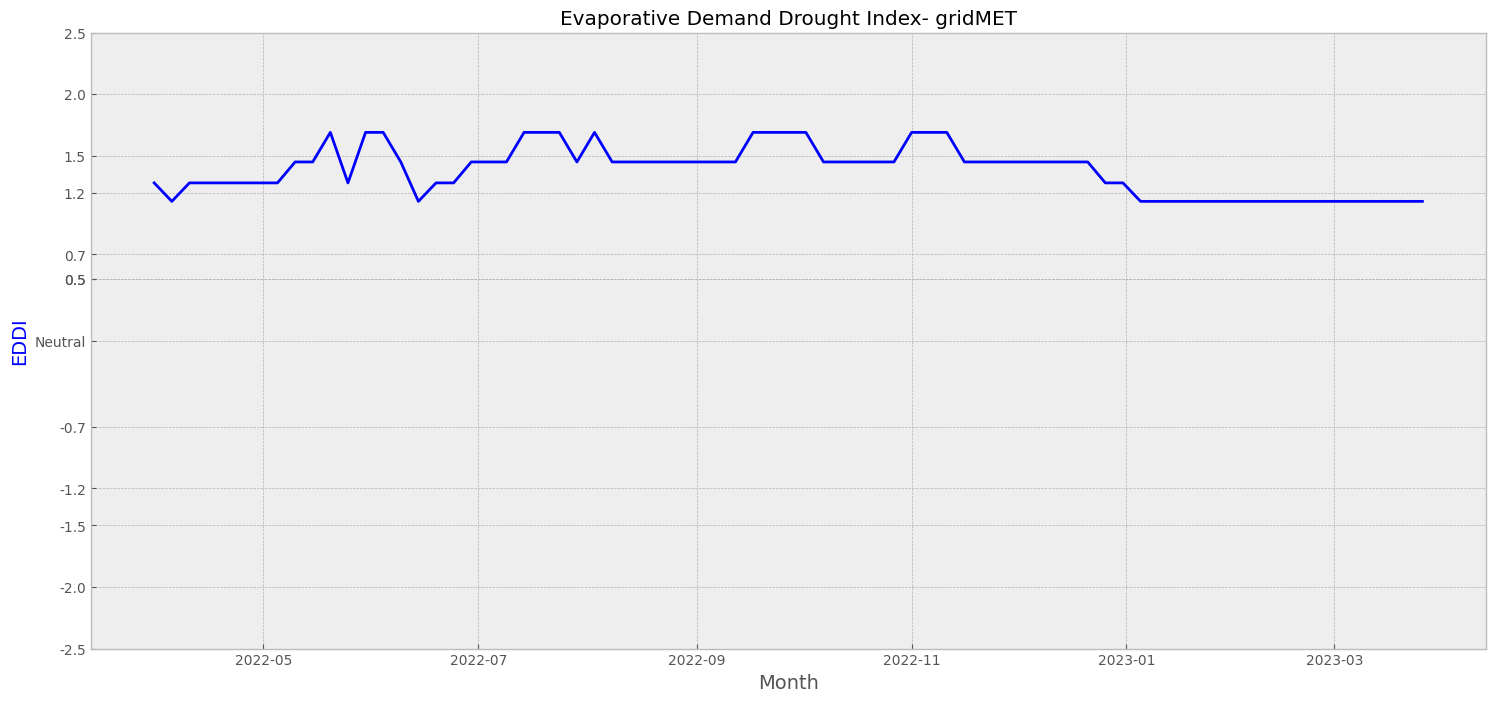

In [195]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (18,8))

# make a plot
ax.plot(date1, value1, color="blue")

#Change Y1 Scale
ax.set_ylim(-2.5, 2.5)

#Change Y steps and labels
y = np.array([-2.5, -2.0, -1.5, -1.2, -0.7, 0.5, 0, 0.5, 0.7, 1.2, 1.5, 2.0, 2.5])
ticks = ['-2.5', '-2.0', '-1.5', '-1.2', '-0.7', '0.5', 'Neutral', '0.5', '0.7', '1.2', '1.5', '2.0', '2.5']
plt.yticks(y, ticks)

#Add x-axis label
ax.set_xlabel("Month", fontsize = 14)

#Add first y-axis label
ax.set_ylabel("EDDI", color="blue", fontsize=14)

#Add Title
plt.title('Evaporative Demand Drought Index- gridMET')

#Export Graph
plt.savefig('EDDI.png', bbox_inches='tight')

#Show Graph
plt.show()

delete_objects('endpoint1', 'endpoint2', 'params1', 'params2', 'r1', 'r2', 'response1', 'response2', 'data', 'df1', 'df2', 'date1', 'date2', 'value1', 'value2', 'ticks', 'timeseries', 'y', 'trace1', 'trace2', 'ax', 'ax2')

**How to interpret the above plots:** 



*   2.5 **-** 2.0: Exceptional Drought
*   2.0 **-** 1.5: Extreme Drought
*   1.5 **-** 1.2: Severe Drought
*   1.2 **-** 0.7: Moderate Drought
*   0.7 **-** 0.5: Abnormal Dry
*   0.5 **-** -0.5: Neutral
*   -0.5 **-** -0.7: Abnormal Wet
*   -0.7 **-** -1.2: Moderate Wet
*   -1.2 **-** 1.5: -Severe Wet
*   -1.5 **-** -2.0: Extreme Wet
*   -2.0 **-** -2.5: Exceptional Wet

